In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# We can make various periodic signals in groups
here, varying by frequency and with random shifts

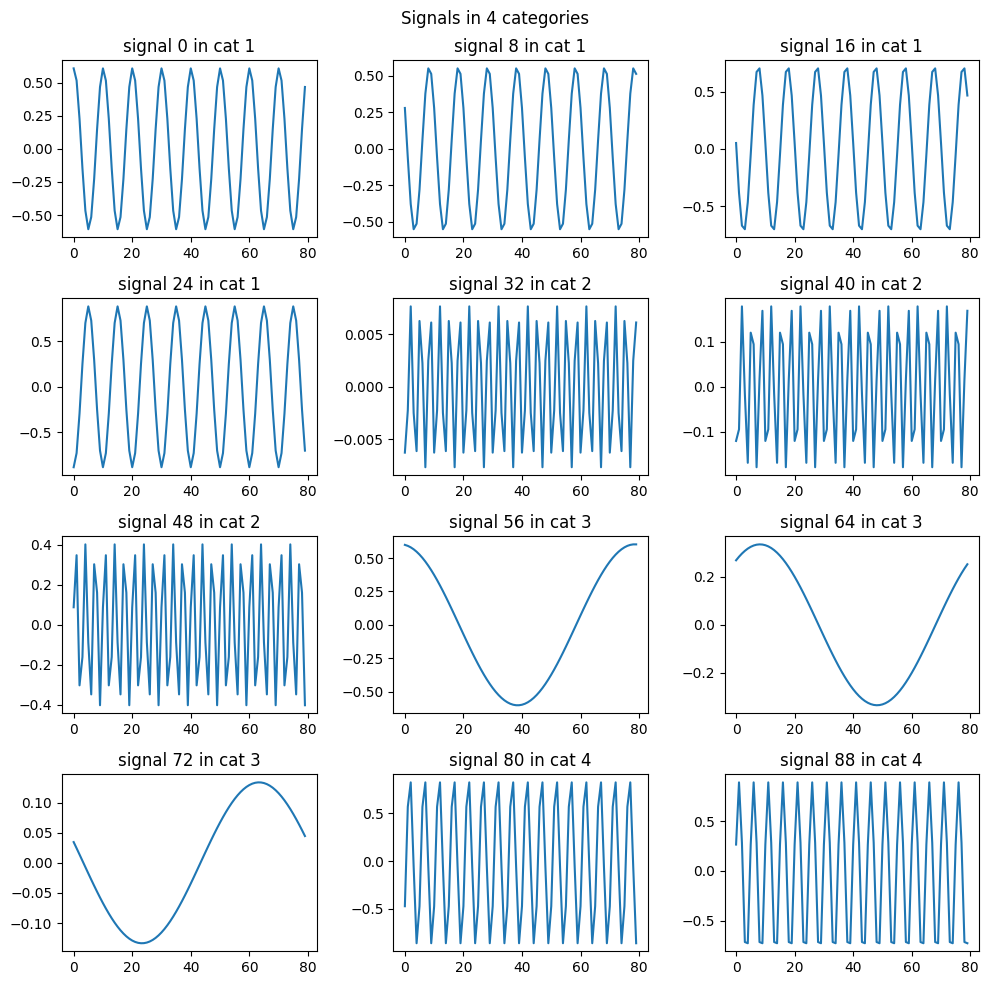

In [4]:
def practice_signals():
  t = np.arange(-4,4,.1)
  T = np.tile(t, (100,1)) + np.random.rand(100,1)*4-2
  out = np.zeros_like(T)
  out[:25] = (np.random.rand(25, 1)*2-1)*np.sin(2*np.pi*T[:25])
  out[25:50] = (np.random.rand(25, 1)*2-1)*np.sin(6*np.pi*T[25:50])
  out[50:75] = (np.random.rand(25, 1)*2-1)*np.sin(1/4*np.pi*T[50:75])
  out[75:] = (np.random.rand(25, 1)*2-1)*np.sin(16*np.pi*T[75:])

  return out
S = practice_signals()

# Now let's see these signals

plt.figure(figsize=(10,10))
for i in range(0,96,8):
  plt.subplot(4,3,i//8 +1)
  plt.plot(S[i])
  plt.title(f"signal {i} in cat {i//25+1}")
plt.suptitle('Signals in 4 categories')
plt.tight_layout()

plt.show()

In [9]:
Y = np.zeros((100,4))
Y[:25,0] =1
Y[25:50,1] =1
Y[50:75,2] =1
Y[75:,3] =1

#made our labels

# We can build a convolutional model to learn these categories

In [10]:
def build_1d_cnn_model(signal_length=80, num_categories=4):
    model = keras.Sequential([
        layers.Input(shape=(signal_length, 1)),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_categories, activation='softmax')
         # Softmax for classification outputs vector of length `num_categories`
        # each with a probability that our signal belongs to said category
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


model = build_1d_cnn_model(signal_length=100, num_categories=4)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 100, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 50, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 25, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,556 (154.52 KB)

 Trainable params: 39,556 (154.52 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
print('Our data is shaped as follows:')
print(f"The input is {S.shape}, and the output labels are {Y.shape}")

Our data is shaped as follows:
The input is (100, 80), and the output labels are (100, 4)


In [12]:
model.fit(S.reshape(100,80,1), Y.reshape(100,4,1), epochs=10, validation_split=.2, shuffle=True)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.2500 - loss: 1.3742 - val_accuracy: 0.2750 - val_loss: 1.4652
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4473 - loss: 1.3299 - val_accuracy: 0.3000 - val_loss: 1.5605
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5465 - loss: 1.2829 - val_accuracy: 0.2500 - val_loss: 1.6861
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5676 - loss: 1.2237 - val_accuracy: 0.2500 - val_loss: 1.8782
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5453 - loss: 1.1682 - val_accuracy: 0.2500 - val_loss: 2.1063
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3912 - loss: 1.0522 - val_accuracy: 0.2500 - val_loss: 2.4438
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3506 - loss: 1.0000 - val_accuracy: 0.2750 - val_loss: 2.6480
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3584 - loss: 0.9188 - val_accuracy: 0.2750 - val_loss: 2.7700

This CNN attempt didn't go amazing, but there was learning in the decrease of loss and improved validation accuracy (over random choice)

# Now we try a Neural Net

In [13]:

def build_nn_model(signal_length=80, num_categories=4):
    model = keras.Sequential([
        layers.Input(shape=(signal_length, 1)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_categories, activation='softmax')  # Softmax again for fun
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage
nn = build_nn_model(signal_length=80, num_categories=4)
nn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,556 (45.14 KB)

 Trainable params: 11,556 (45.14 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
nn.fit(S, Y, epochs=10, validation_split=.2, shuffle=True)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.2852 - loss: 1.3917 - val_accuracy: 0.1500 - val_loss: 1.3545
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6094 - loss: 1.2721 - val_accuracy: 0.1500 - val_loss: 1.3965
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7508 - loss: 1.1935 - val_accuracy: 0.1500 - val_loss: 1.4367
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8562 - loss: 1.0913 - val_accuracy: 0.1500 - val_loss: 1.4689
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8570 - loss: 1.0289 - val_accuracy: 0.1500 - val_loss: 1.4737
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9086 - loss: 0.9345 - val_accuracy: 0.1500 - val_loss: 1.4746
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9109 - loss: 0.8741 - val_accuracy: 0.1500 - val_loss: 1.4514
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9133 - loss: 0.8254 - val_accuracy: 0.1500 - val_loss: 1.4238

certainly a better training accuracy but a much worse validation accuracy. So this model is overfitting and likely would do worse than the CNN in the field.

Theres **Many other models to try**.

# Data processing and augmenting

For one, we could add the fourier transform of the data and add it to training data. Beware, these are imaginary.

## Fourier features

In [15]:
fourier = np.fft.fft(S,axis =  1)

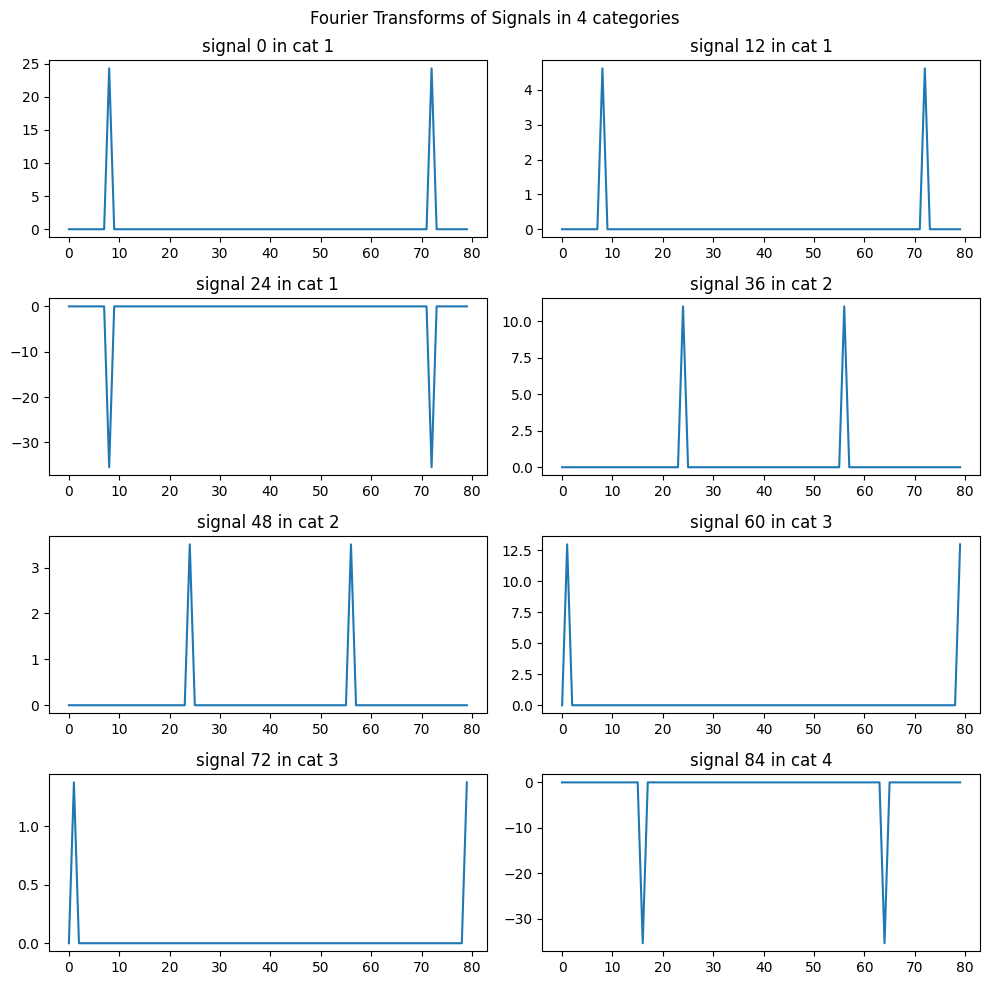

In [17]:
plt.figure(figsize=(10,10))
for i in range(0,96, 12):
  plt.subplot(4,2,i//12+1)
  plt.plot(fourier[i])
  plt.title(f"signal {i} in cat {i//25+1}")
plt.suptitle('Fourier Transforms of Signals in 4 categories')
plt.tight_layout()

plt.show()

In [20]:
fouriercnn = build_1d_cnn_model(signal_length=80*2, num_categories=4)
fouriercnn.summary()
S_fourier = np.concatenate((S,np.real(fourier)), axis = 1)
fouriercnn.fit(S_fourier.reshape(100,80*2,1),
               Y.reshape(100,4,1), epochs=10,
               validation_split=.2, shuffle=True)
print('Our data is shaped as follows:')
print(f"The input is {S_fourier.shape}, and the output labels are {Y.shape}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 160, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 80, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 80, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 40, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,556 (154.52 KB)

 Trainable params: 39,556 (154.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.6629 - loss: 1.3646 - val_accuracy: 0.6750 - val_loss: 1.6553
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4984 - loss: 1.3068 - val_accuracy: 0.2875 - val_loss: 1.8716
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3383 - loss: 1.2632 - val_accuracy: 0.2250 - val_loss: 2.1155
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2246 - loss: 1.2294 - val_accuracy: 0.2375 - val_loss: 2.3576
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1838 - loss: 1.1901 - val_accuracy: 0.2375 - val_loss: 2.6237
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2291 - loss: 1.1521 - val_accuracy: 0.3750 - val_loss: 2.8202
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2805 - loss: 1.1024 - val_accuracy: 0.4500 - val_loss: 2.9360
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3301 - loss: 1.0700 - val_accuracy: 0.4500 - val_loss: 2.9873

Validation_accuracy went up a drop from before.

The matching of training and validation accuracy is a sign of low overfitting. This model may perform as promised in the field given similar signals.

## Data Augmentation

In [34]:
bigS = np.tile(S, (20,1))
bigY = np.tile(Y, (20,1))
print(f'bigS is {bigS.shape} and bigY is {bigY.shape}')
bigS = bigS + np.random.randn(2000,80)*1/8*np.max(bigS,axis=1).reshape(2000,1)

bigS is (2000, 80) and bigY is (2000, 4)


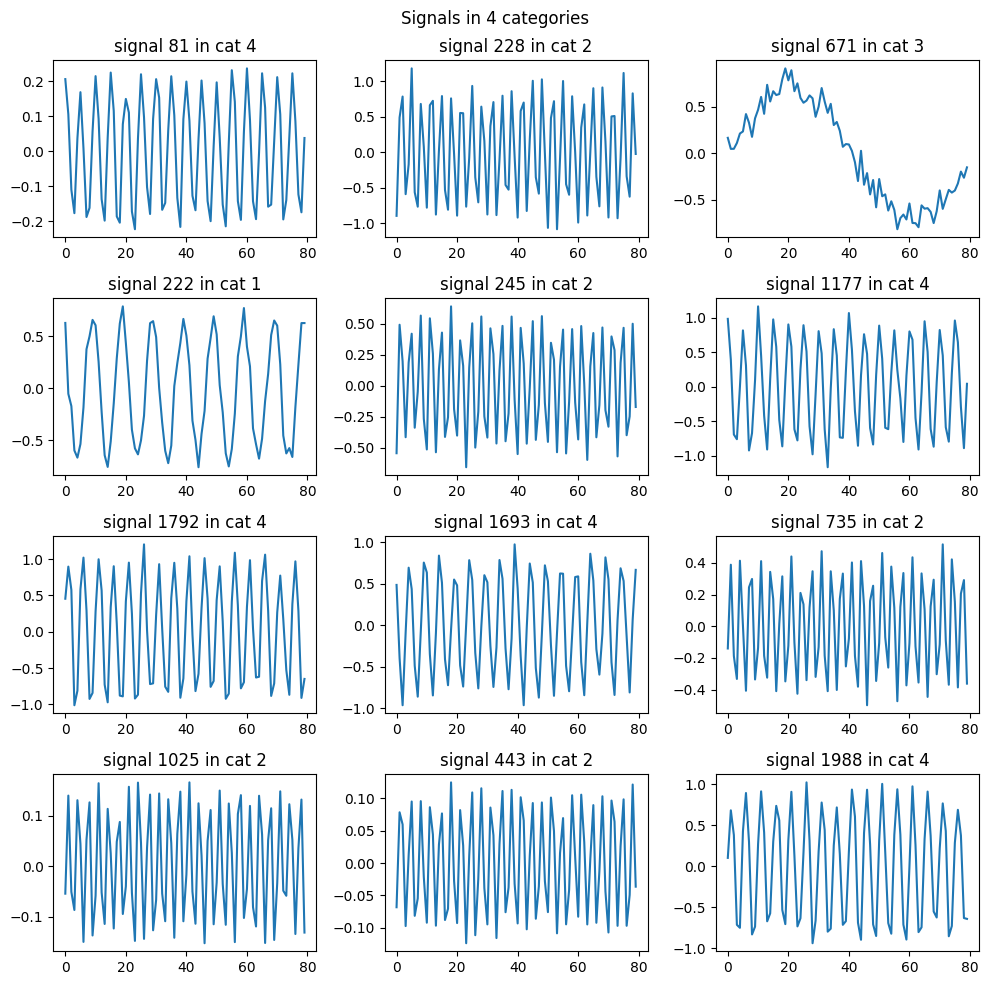

In [35]:
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3,i +1)
  curve_id = np.random.randint(0,2000)
  plt.plot(bigS[curve_id])
  plt.title(f"signal {curve_id} in cat {(curve_id%100)//25+1}")
plt.suptitle('Signals in 4 categories')
plt.tight_layout()

plt.show()

In [28]:
S.shape

(100, 80)

In [40]:
cnn_aug = build_1d_cnn_model(signal_length=80, num_categories=4)
nn_aug = build_nn_model(signal_length=80, num_categories=4)

In [38]:
cnn_aug.fit(bigS.reshape(2000,80,1), bigY.reshape(2000,4,1),
            epochs=20, validation_split=.2, shuffle=True)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2653 - loss: 0.0019 - val_accuracy: 0.2500 - val_loss: 0.0023
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2471 - loss: 0.0020 - val_accuracy: 0.2500 - val_loss: 0.0013
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2466 - loss: 0.0014 - val_accuracy: 0.2500 - val_loss: 0.0013
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2557 - loss: 0.0011 - val_accuracy: 0.2500 - val_loss: 7.1642e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2428 - loss: 5.9241e-04 - val_accuracy: 0.2500 - val_loss: 5.7362e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2569 - loss: 4.5594e-04 - val_accuracy: 0.2500 - val_loss: 4.6276e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2447 - loss: 4.5241e-04 - val_accuracy: 0.2500 - val_loss: 4.1539e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2418 - loss: 3.738

In [41]:
nn_aug.fit(bigS, bigY, epochs=20, validation_split=.2, shuffle=True)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6886 - loss: 1.1254 - val_accuracy: 0.9900 - val_loss: 0.3620
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9972 - loss: 0.2717 - val_accuracy: 1.0000 - val_loss: 0.1093
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 0.0602
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0386
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0259
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 1.0000 - val_loss: 0.0174
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_lo

ok so that... that is a successful model. Data augmentation is cool.